In [45]:
from pathlib import *
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [46]:
cur_dir = Path.cwd()
  
print(cur_dir)

/content/gdrive/MyDrive


In [47]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [48]:
cd /content/gdrive/MyDrive

/content/gdrive/MyDrive


In [87]:
import pathlib


data_dir_train = pathlib.Path(r"Train")

data_dir_test = pathlib.Path(r"Test")




PosixPath('Train')

In [88]:
list(data_dir_train.glob('*/*'))[:5]



[PosixPath('Train/nevus/ISIC_0000020.jpg'),
 PosixPath('Train/nevus/ISIC_0000019.jpg'),
 PosixPath('Train/nevus/ISIC_0000021.jpg'),
 PosixPath('Train/nevus/ISIC_0000025.jpg'),
 PosixPath('Train/nevus/ISIC_0000024.jpg')]

In [52]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)

image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)


2239
118


In [53]:
actinic_keratosis = list(data_dir_train.glob('actinic keratosis/*'))

actinic_keratosis[:5]  #checking image 

[PosixPath('Train/actinic keratosis/ISIC_0025780.jpg'),
 PosixPath('Train/actinic keratosis/ISIC_0025803.jpg'),
 PosixPath('Train/actinic keratosis/ISIC_0025825.jpg'),
 PosixPath('Train/actinic keratosis/ISIC_0025957.jpg'),
 PosixPath('Train/actinic keratosis/ISIC_0025992.jpg')]

Data Preparation

In [54]:
# setting the batch size, height & width of the images
# we're going to use the same setting for all the different models
batch_size = 32
img_height = 180
img_width = 180

In [55]:
# creating the training set
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train, labels='inferred', label_mode='categorical',
    class_names=None, color_mode='rgb', batch_size=batch_size, 
    image_size=(img_height, img_width), shuffle=True, seed=123, 
    validation_split=0.2, subset='training', interpolation='bilinear', 
    follow_links=False, smart_resize=False)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [56]:
# creating the testing set
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train, labels='inferred', label_mode='categorical',
    class_names=None, color_mode='rgb', batch_size=batch_size, 
    image_size=(img_height, img_width), shuffle=True, seed=123, 
    validation_split=0.2, subset='validation', interpolation='bilinear', 
    follow_links=False, smart_resize=False)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [57]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)


['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [58]:
import matplotlib.pyplot as plt

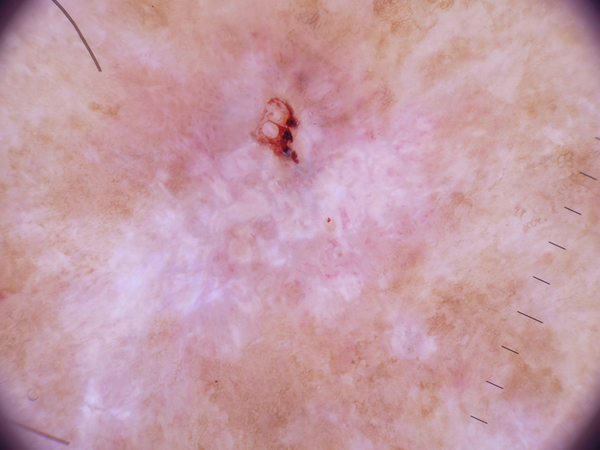

In [59]:
l = ['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']

h = list(data_dir_train.glob('basal cell carcinoma/*'))
PIL.Image.open(str(h[1])) 

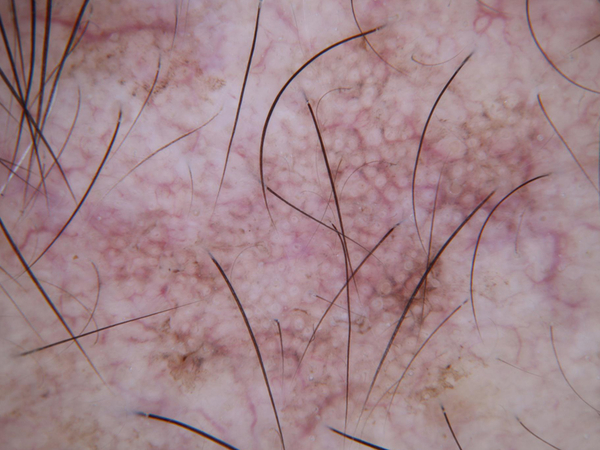

In [60]:
PIL.Image.open(str(actinic_keratosis[1])) #looking one image

In [61]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [62]:
num_classes = 9

model = Sequential([

  tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255, offset=0.0),                     
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [63]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [64]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 15s 74ms/step - loss: 8.8851 - accuracy: 0.2003 - val_loss: 10.4930 - val_accuracy: 0.2058
Epoch 2/20
56/56 [==============================] - 1s 25ms/step - loss: 11.1352 - accuracy: 0.2065 - val_loss: 10.4930 - val_accuracy: 0.2058
Epoch 3/20
56/56 [==============================] - 1s 24ms/step - loss: 11.1352 - accuracy: 0.2065 - val_loss: 10.4930 - val_accuracy: 0.2058
Epoch 4/20
56/56 [==============================] - 1s 24ms/step - loss: 11.1352 - accuracy: 0.2065 - val_loss: 10.4930 - val_accuracy: 0.2058
Epoch 5/20
56/56 [==============================] - 1s 23ms/step - loss: 11.1352 - accuracy: 0.2065 - val_loss: 10.4930 - val_accuracy: 0.2058
Epoch 6/20
56/56 [==============================] - 1s 24ms/step - loss: 11.1352 - accuracy: 0.2065 - val_loss: 10.4930 - val_accuracy: 0.2058
Epoch 7/20
56/56 [==============================] - 1s 24ms/step - loss: 11.1352 - accuracy: 0.2065 - val_loss: 10.4930 - val_accuracy: 0.2058

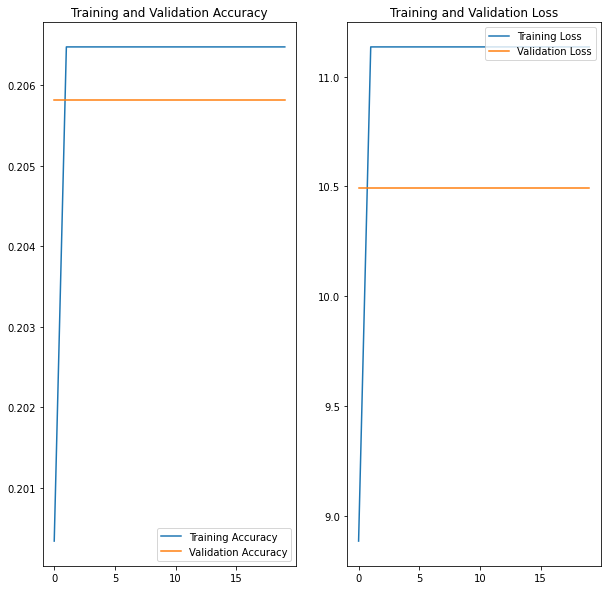

In [68]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## We have accuracy of 20% model is underfit we won't use dropout

In [69]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 45, 45, 64)       

In [90]:
l

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [126]:
print(len(list(data_dir_train.glob('actinic keratosis/*'))), l[0])
print(len(list(data_dir_train.glob('basal cell carcinoma/*'))), l[1])
print(len(list(data_dir_train.glob('dermatofibroma/*'))), l[2])
print(len(list(data_dir_train.glob('melanoma/*'))), l[3])
print(len(list(data_dir_train.glob('nevus/*'))), l[4])
print(len(list(data_dir_train.glob('pigmented benign keratosis/*'))), l[5])
print(len(list(data_dir_train.glob('seborrheic keratosis/*'))), l[6])
print(len(list(data_dir_train.glob('squamous cell carcinoma/*'))), l[7])
print(len(list(data_dir_train.glob('vascular lesion/*'))), l[8])


115 actinic keratosis
377 basal cell carcinoma
96 dermatofibroma
439 melanoma
358 nevus
463 pigmented benign keratosis
78 seborrheic keratosis
182 squamous cell carcinoma
140 vascular lesion


### We can see imbalance in values highest being pigmented benign keratosis and lowest seborrheic keratosis

In [101]:
!pip install Augmentor


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [142]:
s = '/content/gdrive/MyDrive/Train/'

In [121]:
path_to_training_dataset= s
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset +i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F25E0056CD0>: 100%|██████████| 500/500 [00:18<00:00, 27.31 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F257669B390>: 100%|██████████| 500/500 [00:17<00:00, 27.89 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F25F3D126D0>: 100%|██████████| 500/500 [00:18<00:00, 26.84 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F2562C83950>: 100%|██████████| 500/500 [01:30<00:00,  5.52 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x7F25620C2A10>: 100%|██████████| 500/500 [01:19<00:00,  6.29 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F25629F6E10>: 100%|██████████| 500/500 [00:18<00:00, 26.85 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F2562A5DB10>: 100%|██████████| 500/500 [00:41<00:00, 11.94 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F2562CA8590>: 100%|██████████| 500/500 [00:18<00:00, 26.94 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F2562BEC5D0>: 100%|██████████| 500/500 [00:18<00:00, 27.21 Samples/s]


In [122]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


In [ ]:

path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

In [ ]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [ ]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [ ]:
new_df['Label'].value_counts()

In [131]:
batch_size = 32
img_height = 180
img_width = 180

In [132]:
# creating new training set after augmentation
data_dir_train = s
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123, label_mode='categorical',
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [133]:
# creating new testing set after augmentation
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123, label_mode='categorical',
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [134]:
num_classes = 9

model = Sequential([

  tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255, offset=0.0),                     
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [136]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [137]:
epochs = 50 #using 50 as mentioned 
history = model.fit(
          train_ds,
          validation_data=val_ds,
          epochs=epochs)

Epoch 1/50
169/169 [==============================] - 31s 172ms/step - loss: 6.7485 - accuracy: 0.0842 - val_loss: 6.6531 - val_accuracy: 0.0898
Epoch 2/50
169/169 [==============================] - 29s 167ms/step - loss: 6.6810 - accuracy: 0.0846 - val_loss: 6.6531 - val_accuracy: 0.0898
Epoch 3/50
169/169 [==============================] - 30s 174ms/step - loss: 6.6810 - accuracy: 0.0846 - val_loss: 6.6531 - val_accuracy: 0.0898
Epoch 4/50
169/169 [==============================] - 29s 167ms/step - loss: 6.6810 - accuracy: 0.0846 - val_loss: 6.6531 - val_accuracy: 0.0898
Epoch 5/50
169/169 [==============================] - 29s 168ms/step - loss: 6.6810 - accuracy: 0.0846 - val_loss: 6.6531 - val_accuracy: 0.0898
Epoch 6/50
169/169 [==============================] - 29s 167ms/step - loss: 6.6810 - accuracy: 0.0846 - val_loss: 6.6531 - val_accuracy: 0.0898
Epoch 7/50
169/169 [==============================] - 29s 168ms/step - loss: 6.6810 - accuracy: 0.0846 - val_loss: 6.6531 - val_ac

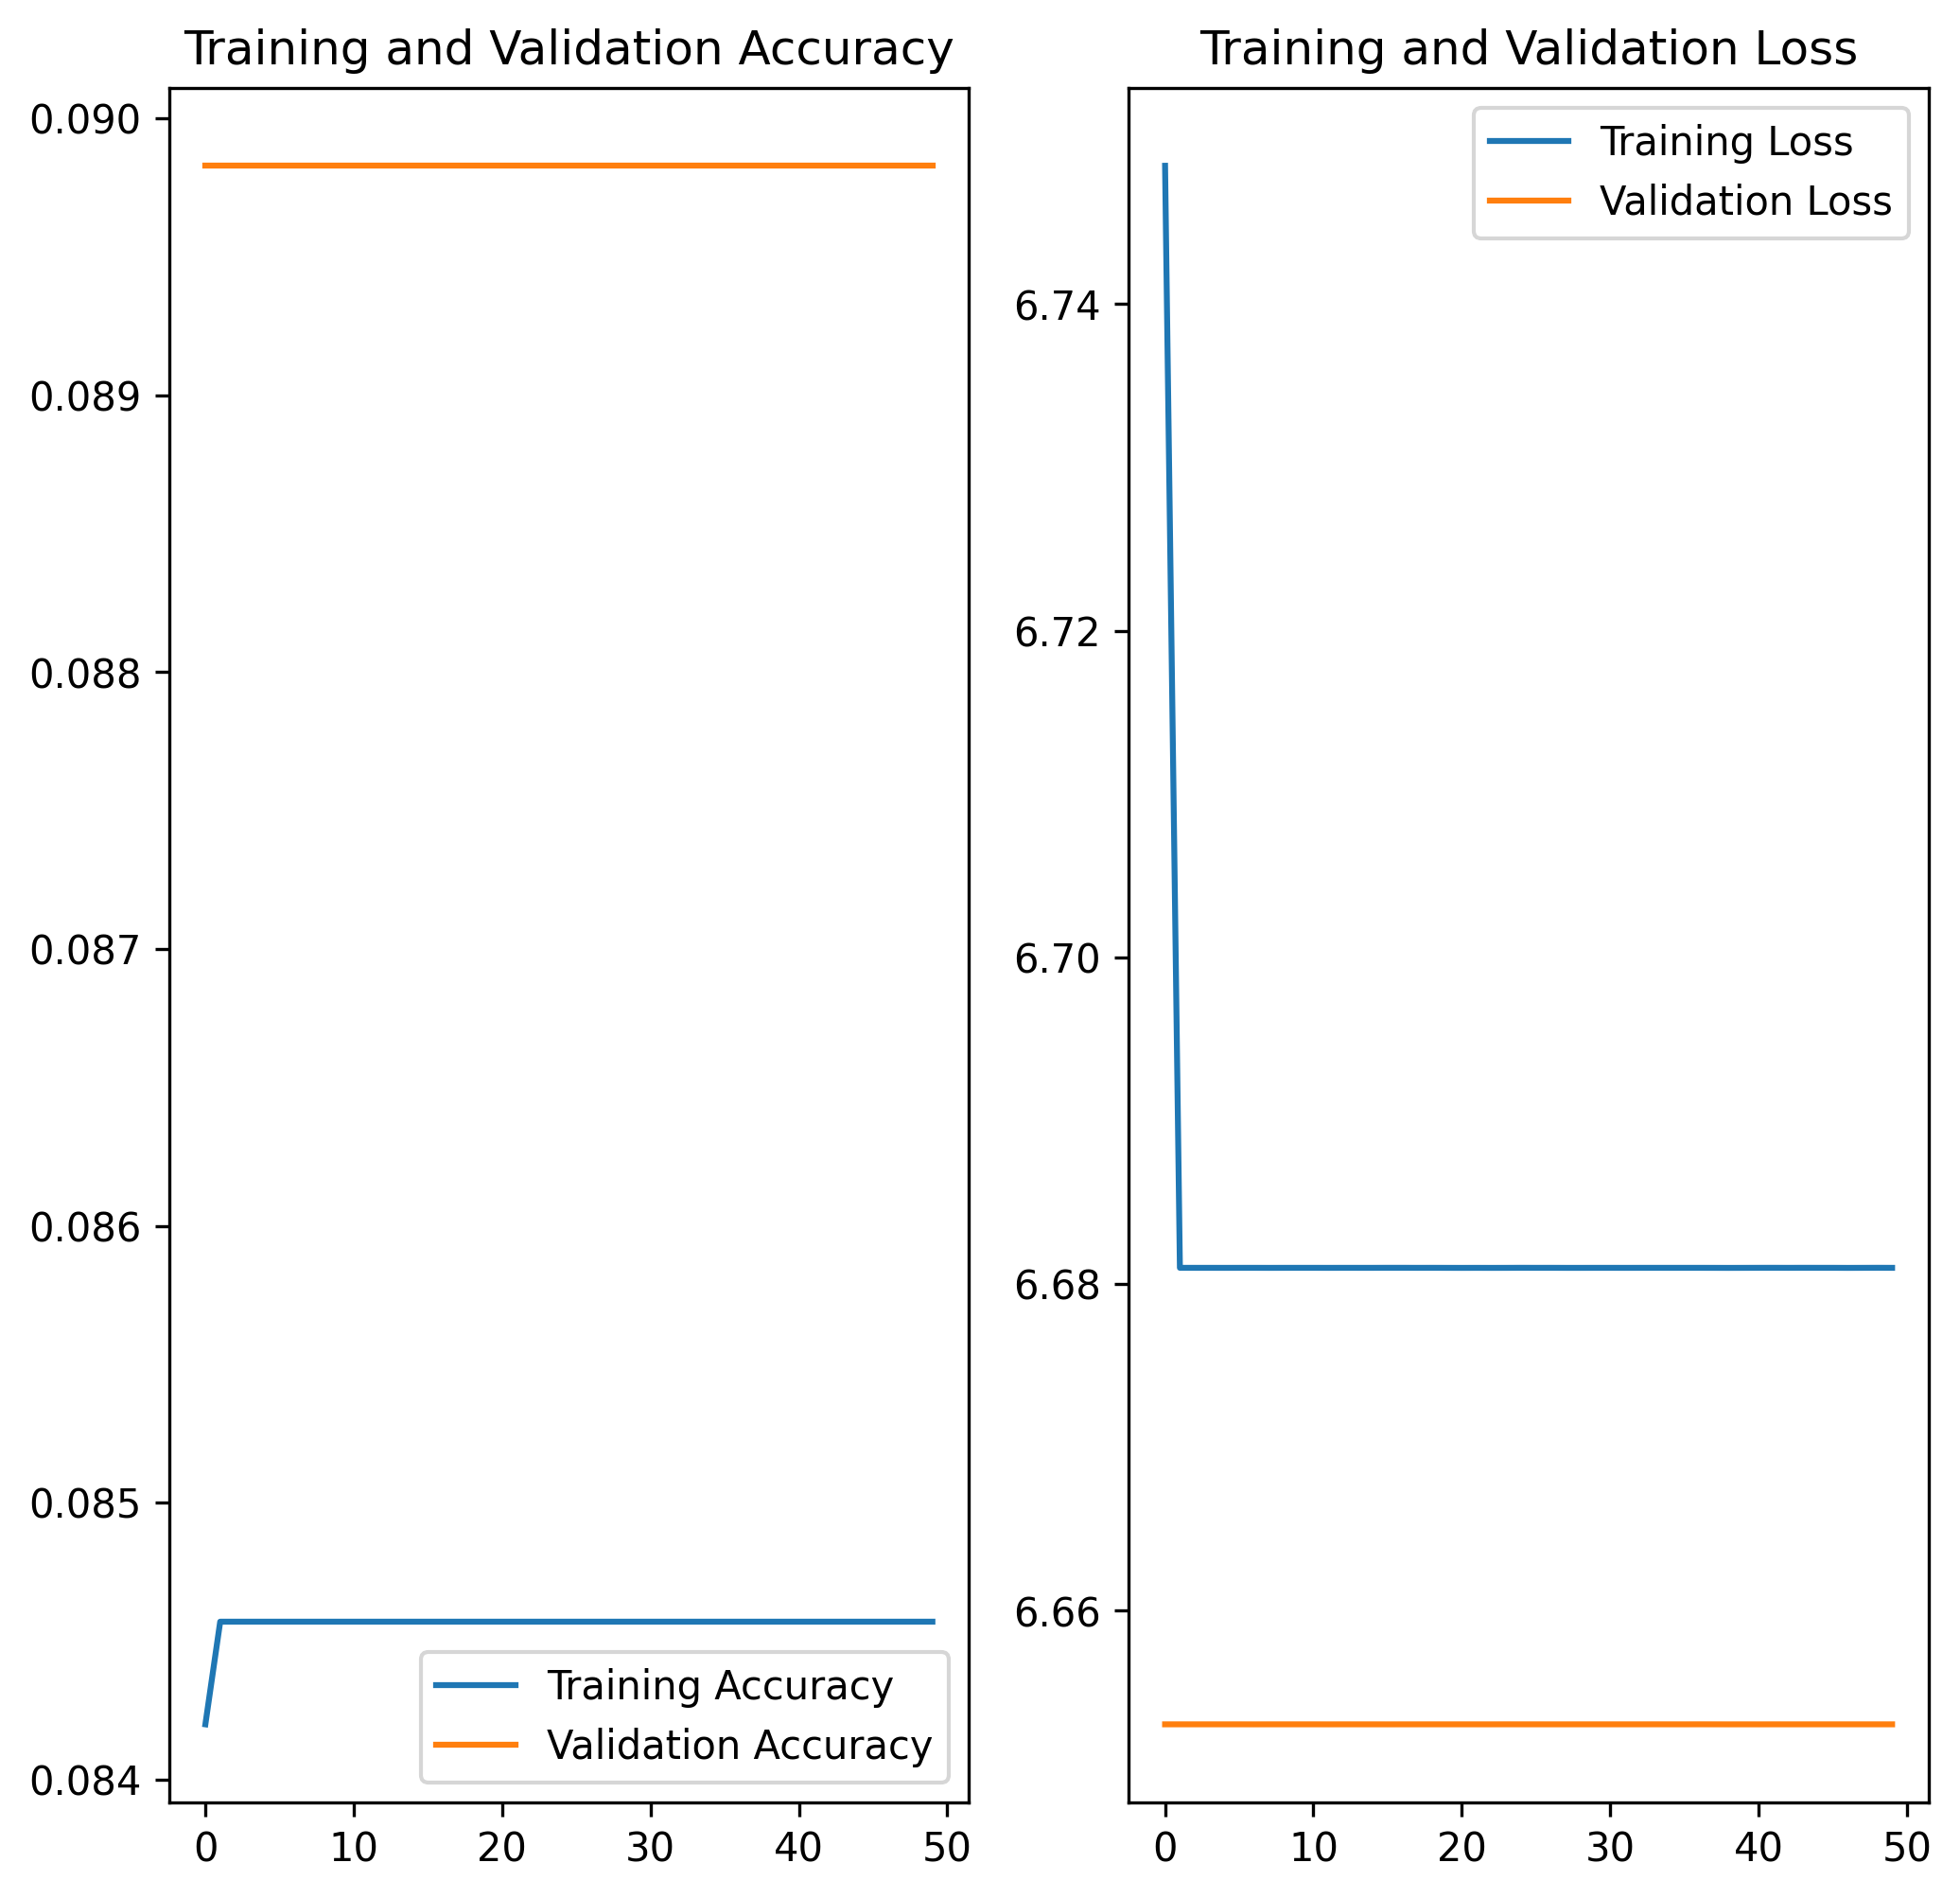

In [140]:
# visualizing the training results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8), dpi=300)

# plotting training and validation accuracies vs epoch
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# plotting training and validation losses vs epoch
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Trying final model using dropout 

In [141]:
num_classes = 9

model = Sequential([

  tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255, offset=0.0),                     
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.3),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

epochs = 50
history = model.fit(
          train_ds,
          validation_data=val_ds,
          epochs=epochs)



Epoch 1/50
169/169 [==============================] - 30s 168ms/step - loss: 11.8423 - accuracy: 0.1282 - val_loss: 12.6240 - val_accuracy: 0.1336
Epoch 2/50
169/169 [==============================] - 29s 167ms/step - loss: 12.3935 - accuracy: 0.1272 - val_loss: 12.6240 - val_accuracy: 0.1336
Epoch 3/50
169/169 [==============================] - 29s 167ms/step - loss: 12.3935 - accuracy: 0.1257 - val_loss: 12.6240 - val_accuracy: 0.1336
Epoch 4/50
169/169 [==============================] - 29s 166ms/step - loss: 12.3935 - accuracy: 0.1267 - val_loss: 12.6240 - val_accuracy: 0.1336
Epoch 5/50
169/169 [==============================] - 29s 167ms/step - loss: 12.3935 - accuracy: 0.1270 - val_loss: 12.6240 - val_accuracy: 0.1336
Epoch 6/50
169/169 [==============================] - 29s 166ms/step - loss: 12.3935 - accuracy: 0.1282 - val_loss: 12.6240 - val_accuracy: 0.1336
Epoch 7/50
169/169 [==============================] - 29s 166ms/step - loss: 12.3935 - accuracy: 0.1272 - val_loss: 12

## We saw improvments in our model